# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('demo01.csv')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [4]:
df_encoded = pd.get_dummies(df,columns=['sexo','posse_de_veiculo','posse_de_imovel','tipo_renda','educacao','estado_civil','tipo_residencia'],drop_first=True)

df_encoded.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,True,True,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,True,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,True,False,False,False,True,False,False,False,False


In [5]:
X = df_encoded.drop(columns=['mau'])
y = df_encoded['mau']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [7]:
X_train.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
13649,1,31.572603,5.183562,1,1,1,0,3.0,False,False,...,False,True,False,False,False,True,False,False,False,False
479,0,60.594521,4.441096,1,0,1,1,2.0,True,True,...,True,True,False,False,False,True,False,False,False,False
15216,1,33.728767,10.873973,1,0,0,0,3.0,False,False,...,True,True,False,False,False,True,False,False,False,False
2403,0,65.024658,16.621918,1,0,0,0,2.0,False,False,...,True,True,False,False,False,True,False,False,False,False
9248,0,31.375342,5.512329,1,0,0,0,2.0,False,True,...,False,False,False,False,False,True,False,False,False,False


In [8]:
y_train.head()

13649    False
479      False
15216    False
2403     False
9248     False
Name: mau, dtype: bool

In [9]:
X_test.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
2875,0,54.583562,2.641096,1,0,0,0,2.0,False,False,...,True,True,False,False,False,True,False,False,False,False
2551,0,44.586301,3.978082,1,0,1,0,2.0,True,False,...,True,False,False,False,False,True,False,False,False,False
935,1,30.156164,2.087671,1,0,0,0,3.0,False,False,...,False,True,False,False,False,True,False,False,False,False
140,0,40.183562,2.186301,1,1,0,0,2.0,False,True,...,True,True,False,False,False,True,False,False,False,False
3048,1,39.989041,5.383562,1,0,0,0,3.0,False,True,...,True,True,False,False,False,True,False,False,False,False


In [10]:
y_test.head()

2875    False
2551    False
935     False
140     False
3048    False
Name: mau, dtype: bool

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [12]:
clf_dt = DecisionTreeClassifier(random_state=100)
clf_dt

DecisionTreeClassifier(random_state=100)

In [13]:
clf_train = clf_dt.fit(X_train,y_train)
clf_train

DecisionTreeClassifier(random_state=100)

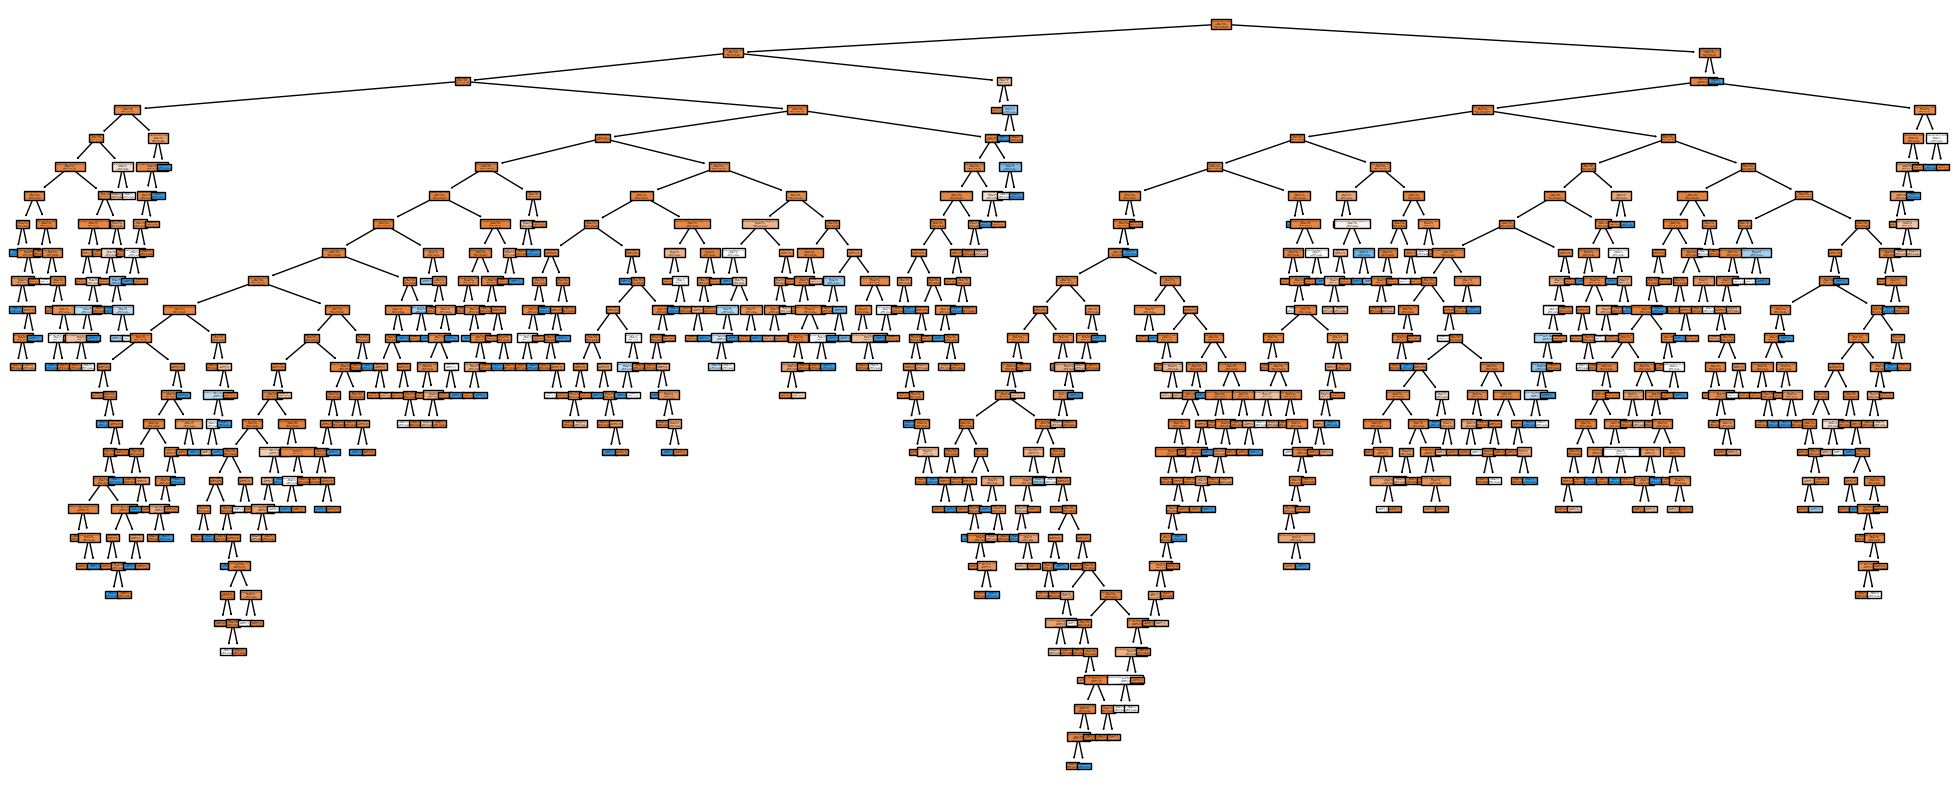

In [14]:
plt.figure(figsize=(25,10))
plot_tree(clf_train,
          filled=True,
          class_names=['Aprovado','Reprovado'],
          feature_names=X.columns);

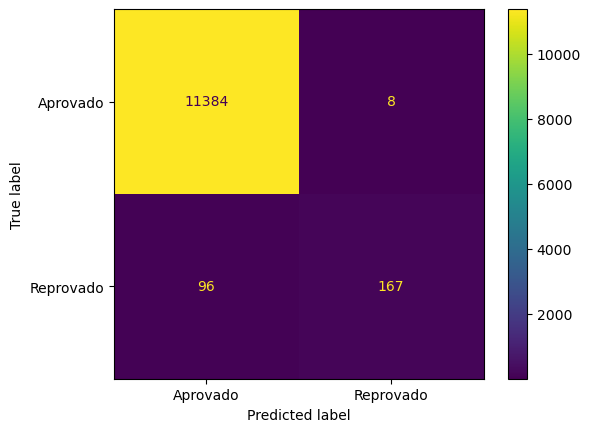

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf_train,X_train,y_train,display_labels=['Aprovado','Reprovado']);

In [16]:
predict_train = clf_train.predict(X_train)

In [17]:
accuracy_score(y_train,predict_train)

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [35]:
clf_test = clf_dt.fit(X_train,y_train)
clf_test

DecisionTreeClassifier(random_state=100)

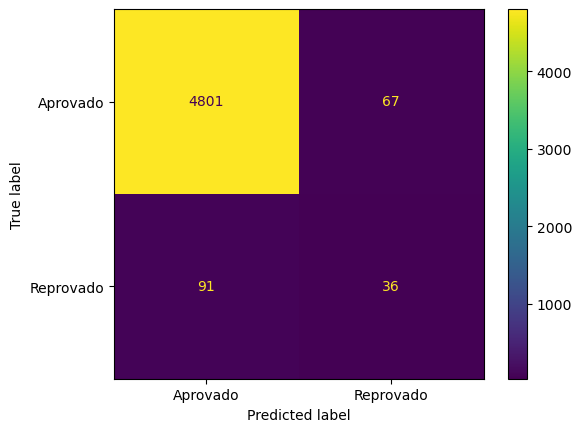

In [37]:
ConfusionMatrixDisplay.from_estimator(clf_test,X_test,y_test,display_labels=['Aprovado','Reprovado']);

In [39]:
predict_test = clf_train.predict(X_test)

In [41]:
accuracy_score(y_test,predict_test)

0.9683683683683684

In [43]:
clf_test = DecisionTreeClassifier(max_depth=10,min_samples_leaf=5,random_state=123)

In [45]:
clf_test.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [54]:
y_predict = clf_test.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

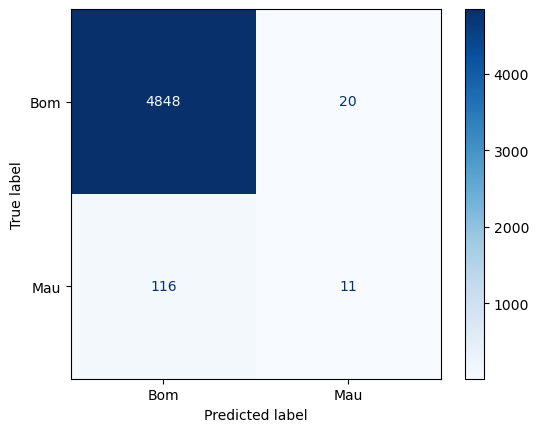

In [58]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bom', 'Mau'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [64]:
(y_predict == 1).mean() * 100

0.6206206206206206

A proporcao dos que foram classificados como maus eh de 0.62%

In [67]:
y_bons = [0] * len(y_test)
accuracy_score(y_test, y_bons)

0.9745745745745745